1. The Crude Oil WTI Futures Monthly and Weekly datasets have similar structures:

## Crude Oil WTI Futures Data Preprocessing (Monthly and Weekly)
The following preprocessing steps will be applied to both the monthly and weekly datasets:
1. **Date Conversion**: Convert the `Date` column to a proper date format (handle inconsistent formats such as day-month-year and month-day-year).
2. **Volume Cleaning**: Convert the `Vol.` column to numeric format by interpreting "K" for thousands and "M" for millions.
3. **Change % Cleaning**: Remove the percentage symbol from the `Change %` column and convert it to a float.
4. **Sorting by Date**: Sort the dataset in ascending order by the `Date` column.


## Preprocessing Steps for Crude Oil WTI Futures Data (Monthly and Weekly)
The following steps will be applied to preprocess both the monthly and weekly datasets:

1. **Date Conversion**: Convert the `Date` column to a consistent date format.
2. **Volume Cleaning**: Convert the `Vol.` column to numeric format by interpreting "K" as thousands and "M" as millions.
3. **Change % Cleaning**: Remove the percentage symbol from the `Change %` column and convert the values to a float.
4. **Sorting by Date**: Sort the dataset in ascending order based on the `Date` column.


## 1. Loading and Preprocessing the Data

In [2]:
# Import required libraries
import pandas as pd

# Load the datasets
monthly_data = pd.read_csv('../Crude Oil WTI Futures - Nov 24 (CLX4)/Crude Oil WTI Futures Month.csv')


In [3]:
# Function to preprocess both datasets
def preprocess_data(df):
    # Step 1: Standardize Date format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%m-%d-%Y')

    # Step 2: Handle missing data (if any)
    df = df.dropna()

    # Step 3: Standardize the 'Vol.' column
    def convert_volume(vol):
        if isinstance(vol, str):
            if 'M' in vol:
                return float(vol.replace('M', '')) * 1_000_000
            elif 'K' in vol:
                return float(vol.replace('K', '')) * 1_000
        return vol
    df['Vol.'] = df['Vol.'].apply(convert_volume)

    # Step 4: Remove '%' symbol from 'Change %' and convert to float
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

    # Step 5: Remove duplicates (if any)
    df = df.drop_duplicates()

    # Step 6: Sort by date in ascending order
    df = df.sort_values('Date')

    return df

In [4]:
# Apply preprocessing to both datasets
monthly_data_clean = preprocess_data(monthly_data)


# Display preprocessed data (first few rows)
print("Monthly Data (Cleaned):")
print(monthly_data_clean.head())



Monthly Data (Cleaned):
         Date  Price   Open   High    Low        Vol.  Change %
59 2019-01-10  54.18  54.28  56.92  50.99  11550000.0      0.20
58 2019-01-11  55.17  54.15  58.74  54.07   9470000.0      1.83
57 2019-01-12  61.06  55.47  62.34  55.35   9270000.0     10.68
56 2020-01-01  51.56  61.60  65.65  50.97  12540000.0    -15.56
55 2020-01-02  44.76  51.01  54.50  43.85  13330000.0    -13.19


C:\Users\verma\AppData\Local\Temp\ipykernel_19156\3887167800.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vol.'] = df['Vol.'].apply(convert_volume)
C:\Users\verma\AppData\Local\Temp\ipykernel_19156\3887167800.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Change %'] = df['Change %'].str.replace('%', '').astype(float)


In [5]:
# Save the preprocessed data to new CSV files
monthly_data_clean.to_csv('Crud_Oil_Futures_Monthly_Cleaned.csv', index=False)



In [6]:
# Import necessary libraries
import pandas as pd

# Load the weekly dataset
weekly_data = pd.read_csv('../Crude Oil WTI Futures - Nov 24 (CLX4)/Crude Oil WTI Futures Weekly.csv')

# Function to preprocess the weekly dataset
def preprocess_weekly_data(df):
    # Step 1: Standardize Date format to YYYY-MM-DD
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%m-%d-%Y')

    # Step 2: Handle missing data by dropping rows with missing values
    df = df.dropna()

    # Step 3: Standardize the 'Vol.' column (convert 'M' for millions and 'K' for thousands to numeric values)
    def convert_volume(vol):
        if isinstance(vol, str):
            if 'M' in vol:
                return float(vol.replace('M', '')) * 1_000_000
            elif 'K' in vol:
                return float(vol.replace('K', '')) * 1_000
        return vol
    df['Vol.'] = df['Vol.'].apply(convert_volume)

    # Step 4: Remove '%' symbol from 'Change %' column and convert to float
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

    # Step 5: Remove duplicate rows if any
    df = df.drop_duplicates()

    # Step 6: Sort the data by date in ascending order
    df = df.sort_values('Date')

    return df

# Apply preprocessing to the weekly data
weekly_data_clean = preprocess_weekly_data(weekly_data)

# Save the preprocessed weekly data to a new CSV file
weekly_data_clean.to_csv('Crude_Oil_WTI_Futures_Weekly_Cleaned.csv', index=False)

# Display the first few rows of the cleaned dataset
weekly_data_clean.head()


C:\Users\verma\AppData\Local\Temp\ipykernel_19156\2849211089.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vol.'] = df['Vol.'].apply(convert_volume)
C:\Users\verma\AppData\Local\Temp\ipykernel_19156\2849211089.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Change %'] = df['Change %'].str.replace('%', '').astype(float)


,Date,Price,Open,High,Low,Vol.,Change %
258,2019-10-06,54.70,52.69,54.93,51.38,3200000.0,3.58
254,2019-11-03,57.24,56.41,57.88,55.76,2950000.0,1.85
253,2019-11-10,57.72,57.40,57.97,56.20,2530000.0,0.84
250,2019-12-01,59.20,55.47,59.85,55.35,3270000.0,7.30
249,2019-12-08,60.07,59.11,60.48,58.11,2710000.0,1.47


In [7]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned datasets
monthly_data_cleaned = pd.read_csv('./Crud_Oil_Futures_Monthly_Cleaned.csv')
weekly_data_cleaned = pd.read_csv('./Crude_Oil_WTI_Futures_Weekly_Cleaned.csv')


In [8]:
# Convert 'Date' column to datetime for proper plotting
monthly_data_cleaned['Date'] = pd.to_datetime(monthly_data_cleaned['Date'])
weekly_data_cleaned['Date'] = pd.to_datetime(weekly_data_cleaned['Date'])


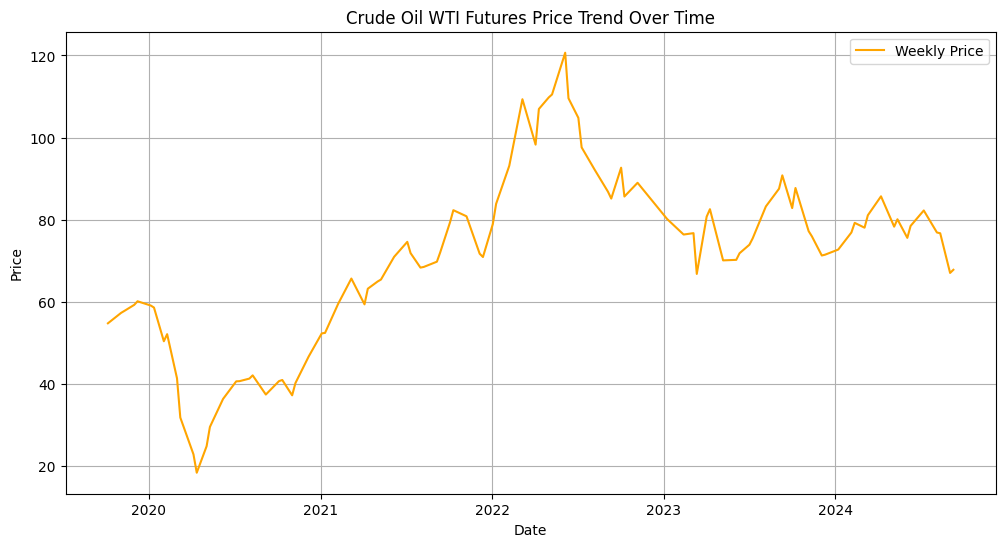

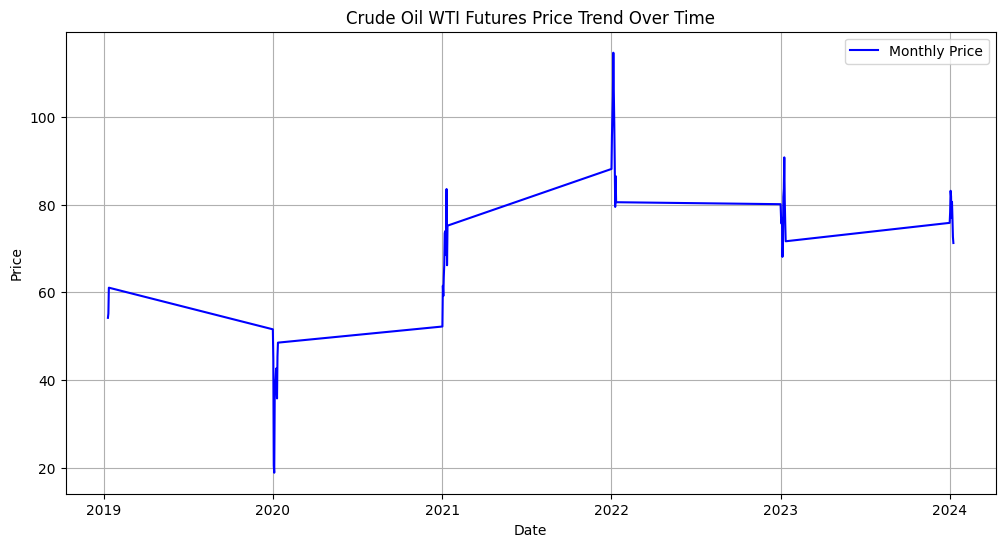

In [12]:
# 1. Plot: Price Trend Over Time (Monthly & Weekly)
plt.figure(figsize=(12, 6))

plt.plot(weekly_data_cleaned['Date'], weekly_data_cleaned['Price'], label='Weekly Price', color='orange')
plt.title('Crude Oil WTI Futures Price Trend Over Time weekly')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 1. Plot: Price Trend Over Time (Monthly & Weekly)
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_cleaned['Date'], monthly_data_cleaned['Price'], label='Monthly Price', color='blue')

plt.title('Crude Oil WTI Futures Price Trend Over Time Monthly')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

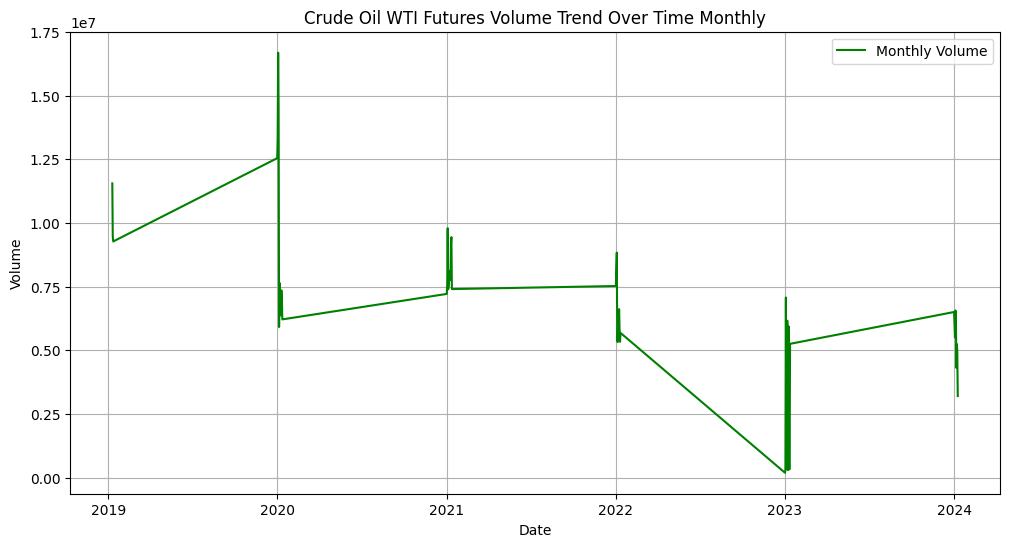

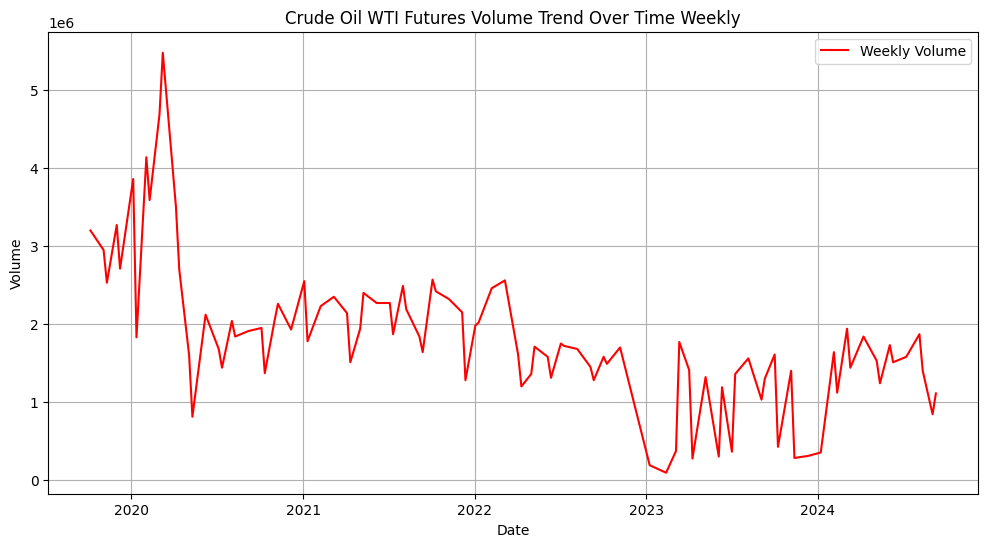

In [14]:
# Plot 2: Volume Trend Over Time (Monthly & Weekly)
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_cleaned['Date'], monthly_data_cleaned['Vol.'], label='Monthly Volume', color='green')

plt.title('Crude Oil WTI Futures Volume Trend Over Time Monthly')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Volume Trend Over Time (Monthly & Weekly)
plt.figure(figsize=(12, 6))

plt.plot(weekly_data_cleaned['Date'], weekly_data_cleaned['Vol.'], label='Weekly Volume', color='red')
plt.title('Crude Oil WTI Futures Volume Trend Over Time Weekly')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()



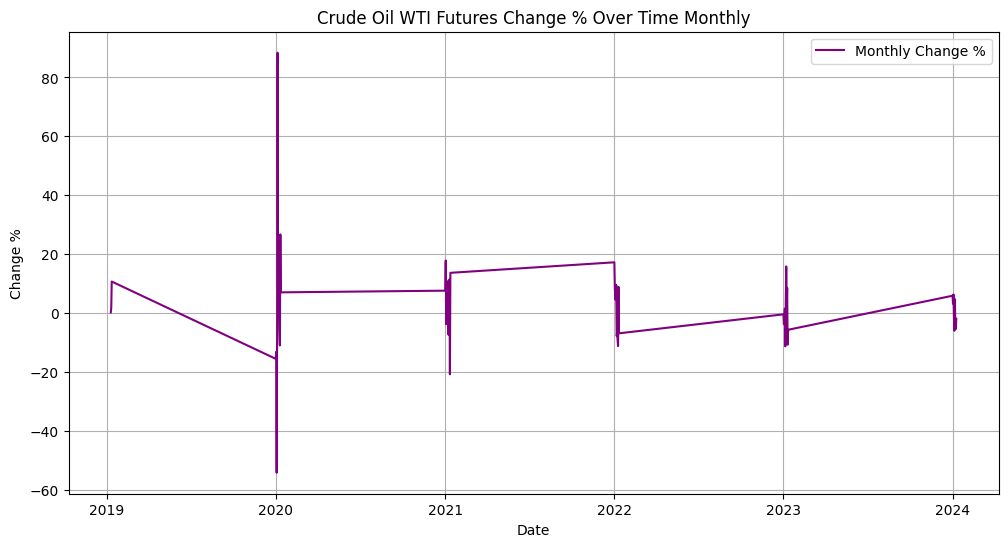

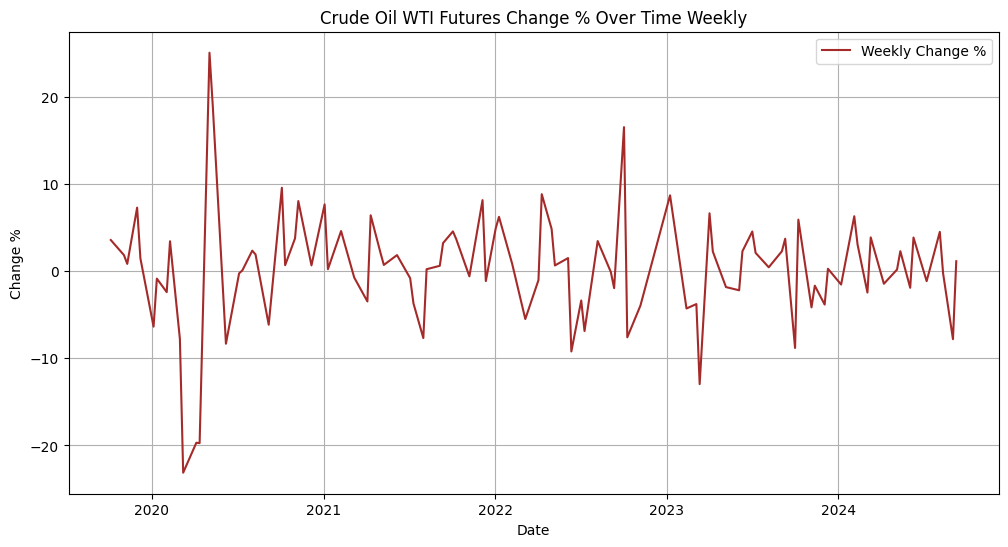

In [15]:
# Plot 3: Change % Over Time (Monthly & Weekly)
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_cleaned['Date'], monthly_data_cleaned['Change %'], label='Monthly Change %', color='purple')

plt.title('Crude Oil WTI Futures Change % Over Time Monthly')
plt.xlabel('Date')
plt.ylabel('Change %')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Change % Over Time (Monthly & Weekly)
plt.figure(figsize=(12, 6))

plt.plot(weekly_data_cleaned['Date'], weekly_data_cleaned['Change %'], label='Weekly Change %', color='brown')
plt.title('Crude Oil WTI Futures Change % Over Time Weekly')
plt.xlabel('Date')
plt.ylabel('Change %')
plt.legend()
plt.grid(True)
plt.show()

In [13]:

# 3. Descriptive Statistics for Monthly and Weekly Data
# Monthly Statistics
print("Monthly Data Descriptive Statistics:\n")
print(monthly_data_cleaned.describe())

# Weekly Statistics
print("\nWeekly Data Descriptive Statistics:\n")
print(weekly_data_cleaned.describe())

Monthly Data Descriptive Statistics:

                                Date       Price        Open        High  \
count                             59   59.000000   59.000000   59.000000   
mean   2021-10-05 08:32:32.542372864   69.949492   69.749153   75.825424   
min              2019-01-10 00:00:00   18.840000   19.040000   29.130000   
25%              2020-07-07 12:00:00   57.165000   54.875000   63.075000   
50%              2022-01-03 00:00:00   75.030000   75.120000   78.540000   
75%              2023-01-06 12:00:00   81.410000   81.395000   85.190000   
max              2024-01-09 00:00:00  114.670000  115.400000  130.500000   
std                              NaN   20.419443   20.623147   21.657584   

              Low          Vol.   Change %  
count   59.000000  5.900000e+01  59.000000  
mean    63.145254  6.526840e+06   1.712712  
min    -40.320000  1.893200e+05 -54.240000  
25%     52.855000  5.360000e+06  -6.140000  
50%     67.120000  6.560000e+06   1.830000  
75%    